In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./output.csv')
df.set_index('matrix dimension', inplace=True)

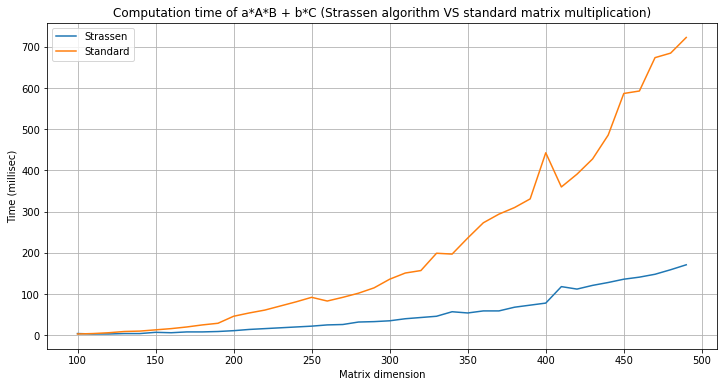

In [3]:
figure = plt.figure(figsize=(12,6))
plt.plot(df)
plt.grid()
plt.legend(["Strassen", "Standard"])
plt.title("Computation time of a*A*B + b*C (Strassen algorithm VS standard matrix multiplication)")
plt.xlabel("Matrix dimension")
plt.ylabel("Time (millisec)")
plt.show()